# Representation Matters

Data may be in a form that is difficult or complex to deal with. Often, it needs to be transformed to make it easier and more effective to work with. That means that you may need to do some feature engineering to filter and transform it into more useful data. This data transformation may be manual or algorithmically automated.  

For example, you may want to transform a data column in a data set or a data stream by doing any of the following operations:  
- Convert between coordinate systems, such going from cartesian to polar coordinates.
- Transform a data column by applying a mathematical function, such as a logarithm or trig function.
- Normalize the data to have a desired mean and/or standard deviation or range.
- Filter out extreme outliers.
- Select columns of interest from a large complex data set (dimensionality reduction).
- Change the data type of a column.

In deep neural network machine learning, it is often the case that the data you work with can be automatically transformed in various ways using multiple hidden layers. Each layer transforms the data to make it more useful to the next layer (abstraction).  

To understand how important data representation can be, consider how the heliocentric model greatly simplifies the mathematics of calculating planetary motion compared to the older geo-centric model.  

## Geo-Centric Model of Planetary Motion
<img src="https://upload.wikimedia.org/wikipedia/commons/0/0e/Cassini_apparent.jpg" width="400">

## Cartesian vs Polar Representations
Lets now look at a simple example of how the coordinate system representation can simplify a problem.

data_count_total: 1000
data_count_inner: 209
data_count_outer: 791


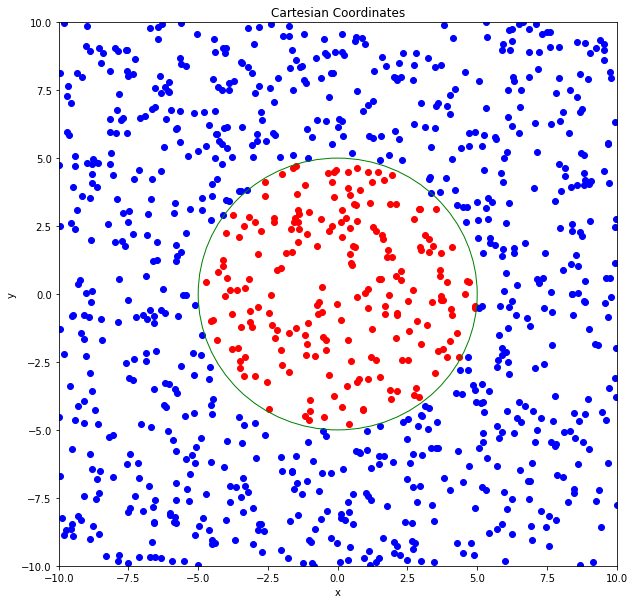

In [1]:
%matplotlib inline

import random
import matplotlib.pyplot as plt

# Generate some cartesian coordinate data
data_count_total = 1000
x_list = [random.uniform(-10, 10) for _ in range(data_count_total)] # x coordinates from -10 to +10
y_list = [random.uniform(-10, 10) for _ in range(data_count_total)] # y coordinates from -10 to +10

# split data into inner and outer data sets based on distance from cartesian coordinate system origin
x_list_inner = []
y_list_inner = []
x_list_outer = []
y_list_outer = []
data_count_inner = 0
data_count_outer = 0
for i in range(data_count_total):
    if (x_list[i]**2 + y_list[i]**2)**0.5 < 5: # inside radius of 5
        x_list_inner.append(x_list[i])
        y_list_inner.append(y_list[i])
        data_count_inner += 1
    else:                                  # outside radius of 5
        x_list_outer.append(x_list[i])
        y_list_outer.append(y_list[i])
        data_count_outer += 1

print("data_count_total:", data_count_total)
print("data_count_inner:", data_count_inner)
print("data_count_outer:", data_count_outer)

# plot the data using cartesian coordinates to visualize the inner and outer data sets
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_list_inner, y_list_inner, c='r')
ax.scatter(x_list_outer, y_list_outer, c='b')
circle = plt.Circle((0, 0), 5, color='g', fill=False)
ax.add_artist(circle)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cartesian Coordinates")
plt.show()

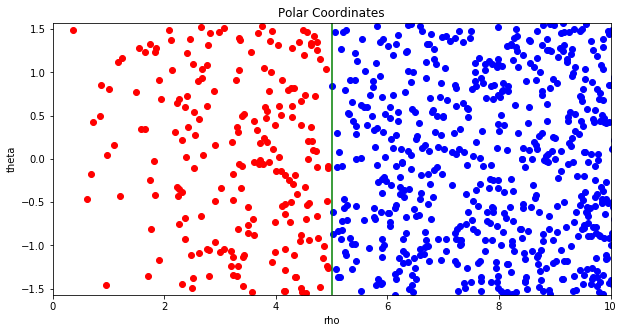

In [2]:
import math

# transform the data from cartesian coordinates to polar coordinates
rho_list_inner = []
theta_list_inner = []
for i in range(data_count_inner):
    rho_list_inner.append((x_list_inner[i]**2 + y_list_inner[i]**2)**0.5)
    theta_list_inner.append(math.atan(y_list_inner[i]/x_list_inner[i]))
rho_list_outer = []
theta_list_outer = []
for i in range(data_count_outer):
    rho_list_outer.append((x_list_outer[i]**2 + y_list_outer[i]**2)**0.5)
    theta_list_outer.append(math.atan(y_list_outer[i]/x_list_outer[i]))

# plot the data using polar coordinates to visualize the inner and outer data sets
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(rho_list_inner, theta_list_inner, c='r')
ax.scatter(rho_list_outer, theta_list_outer, c='b')
plt.axvline(x=5, c="g")
ax.set_xlim([0, 10])
ax.set_ylim([-math.pi/2, math.pi/2])
plt.xlabel("rho")
plt.ylabel("theta")
plt.title("Polar Coordinates")
plt.show()